In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

# Path to your CSV file in Google Drive
cirrhosis_dataset = '/content/drive/MyDrive/dataset/cirrhosis_new.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Print dataset values
dataf = pd.read_csv(cirrhosis_dataset)
print(dataf.head())

   ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2  

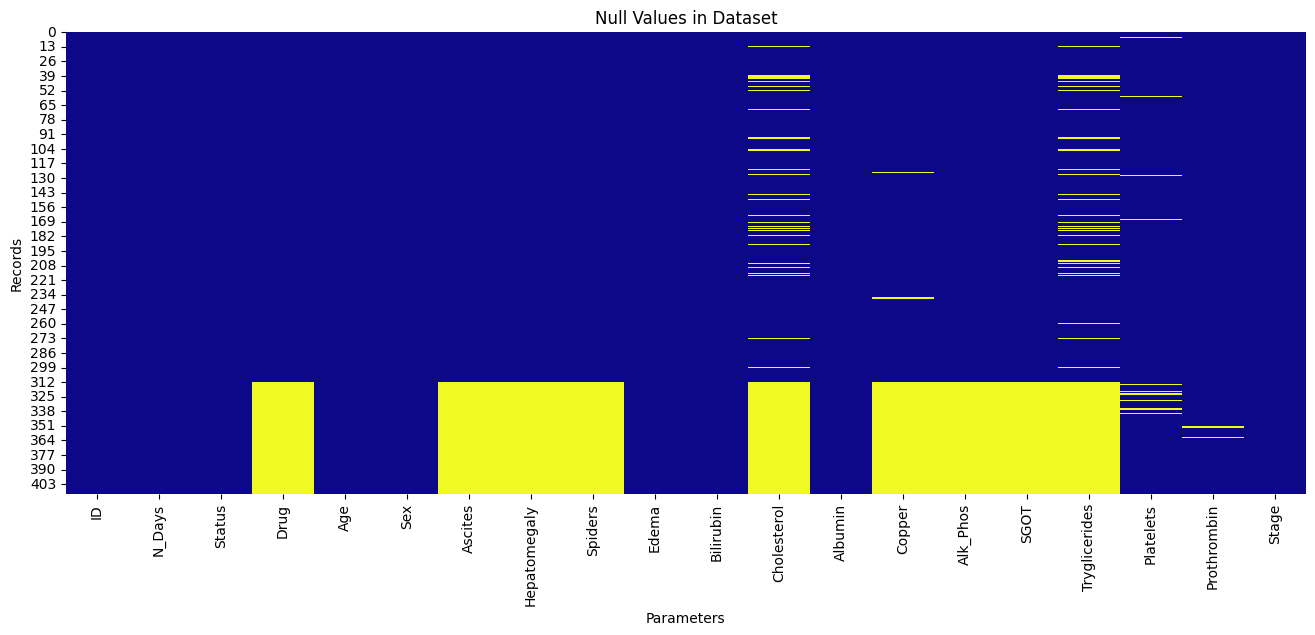

In [5]:
#Plot the heatmap of null values
Null_values = dataf.isnull()
plt.figure(figsize=(16, 6))
sns.heatmap(Null_values, cmap='plasma', cbar=False)
plt.title('Null Values in Dataset')
plt.xlabel('Parameters')
plt.ylabel('Records')
plt.show()

In [6]:
# Convert 'Age' column from float to integer by taking the floor value
dataf['Age'] = dataf['Age'] / 365.25
dataf['Age'] = dataf['Age'].apply(math.floor)
dataf.fillna('NA', inplace=True)   #Replace empty columns with NA
print(dataf['Age'].head())
dataf.to_csv('processed_data.csv', index=False)  #Save the modified data in other csv file

0    58
1    56
2    70
3    54
4    38
Name: Age, dtype: int64


In [7]:
#processed data path
processed_data = '/content/processed_data.csv'

#Load  new csv
dataf1 = pd.read_csv(processed_data)
print(dataf1.head())

   ID  N_Days Status             Drug  Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine   58   F       Y            Y       Y   
1   2    4500      C  D-penicillamine   56   F       N            Y       Y   
2   3    1012      D  D-penicillamine   70   M       N            N       N   
3   4    1925      D  D-penicillamine   54   F       N            Y       Y   
4   5    1504     CL          Placebo   38   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2      4  
1   

# Information about the Parameters

1.**Ascites**: Accumulation of fluid in the abdominal cavity, often associated
with advanced liver disease such as cirrhosis. It results from increased pressure in the blood vessels of the liver (portal hypertension) and low levels of protein in the blood.

2. **Hepatomegaly**: Enlargement of the liver, a common finding in various liver diseases including cirrhosis. It occurs due to inflammation, fatty liver changes, or scarring (fibrosis) of liver tissue.

3. **Spiders**: Spider angiomas or spider nevi are small, dilated blood vessels near the surface of the skin, often seen in individuals with liver cirrhosis. They are caused by changes in blood flow and hormone levels due to liver dysfunction.

4. **Edema**: Swelling caused by fluid retention, typically in the legs or abdomen. In liver cirrhosis, edema may occur due to decreased protein production by the liver, leading to low levels of albumin in the blood, and increased pressure in the blood vessels.

5. **Bilirubin**: A yellowish pigment produced when red blood cells break down. Elevated levels of bilirubin in the blood (hyperbilirubinemia) can indicate liver dysfunction, as the liver is responsible for processing and excreting bilirubin.

6. **Cholesterol**: A type of fat found in the blood, with high levels associated with an increased risk of cardiovascular disease. Liver cirrhosis can affect cholesterol metabolism, leading to abnormal lipid profiles.

7. **Albumin**: A protein produced by the liver that helps maintain fluid balance in the blood and carries various substances such as hormones and medications. Low levels of albumin (hypoalbuminemia) are commonly seen in liver cirrhosis due to decreased liver function.

8. **Copper**: An essential trace mineral involved in various metabolic processes. In liver cirrhosis, copper metabolism may be impaired, leading to abnormal accumulation of copper in the liver and other organs (Wilson's disease).

9. **Alk_Phosph**: Alkaline phosphatase is an enzyme found in various tissues including the liver, bones, and bile ducts. Elevated levels of alkaline phosphatase in the blood may indicate liver or bone disease, including liver cirrhosis.

10. **SGOT (Serum Glutamic Oxaloacetic Transaminase)**: Also known as AST (Aspartate Aminotransferase), it is an enzyme found in the liver and other tissues. Elevated SGOT levels in the blood may indicate liver damage or inflammation, which can occur in liver cirrhosis.

11. **Tryglicerides**: Triglycerides are a type of fat found in the blood. Elevated triglyceride levels are associated with an increased risk of cardiovascular disease. Liver cirrhosis can lead to abnormalities in lipid metabolism, potentially affecting triglyceride levels.

12. **Platelets**: Blood cells involved in clotting. In liver cirrhosis, platelet counts may decrease due to decreased production by the damaged liver or increased sequestration in the spleen, leading to a higher risk of bleeding.

13. **Prothrombin**: Prothrombin time (PT) measures the time it takes for blood to clot. Liver cirrhosis can impair the liver's ability to produce clotting factors, leading to prolonged PT and an increased risk of bleeding.




In [8]:
#Information regarding dataset
dataf1.info()
dataf1.head()
dataf1.isnull().sum()
dataf1.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             412 non-null    int64  
 1   N_Days         412 non-null    int64  
 2   Status         412 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            412 non-null    int64  
 5   Sex            412 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          412 non-null    object 
 10  Bilirubin      412 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        412 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      401 non-null    float64
 18  Prothrombi

0

In [9]:
#dropping columns ID N_days and Status
dataf1.drop(['ID',"N_Days","Status"], axis=1, inplace=True)

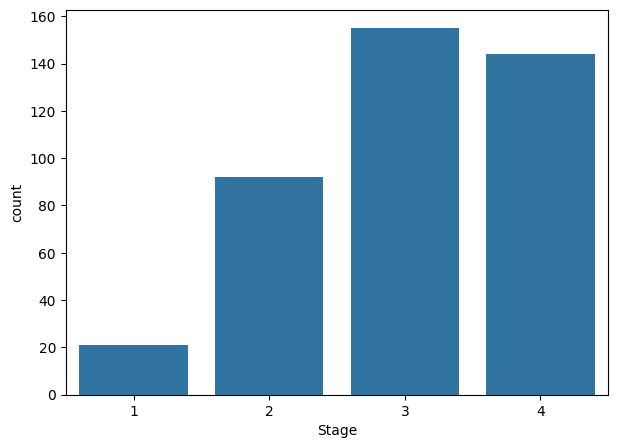

In [10]:
#Plot count of number of data for different stages
fig = plt.figure(figsize=(7,5))
sns.countplot(x='Stage', data =dataf1)
plt.show()

In [11]:
#Include random samples in data to equal the number of data for each stages
X= dataf1.drop('Stage', axis=1)
y = dataf1['Stage']
random = RandomOverSampler(random_state=42)
X_resampled, y_resampled = random.fit_resample(X, y)
dataf1 = pd.concat([X_resampled, y_resampled], axis=1)
dataf1 = dataf1.sample(frac=1, random_state=42).reset_index(drop=True)

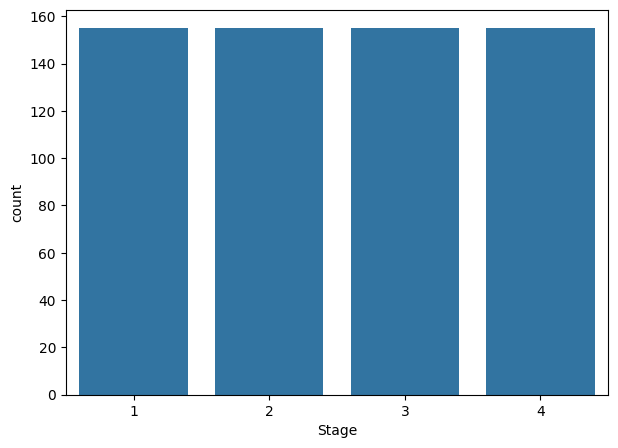

In [12]:
#plot the graph
fig = plt.figure(figsize=(7,5))
sns.countplot(x='Stage', data =dataf1)
plt.show()

In [13]:
#Print Value counts for each column
category_columns = ['Stage', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
for column in category_columns:
    print(f"Column: {column}")
    print(dataf1[column].value_counts())
    print()

Column: Stage
4    155
2    155
3    155
1    155
Name: Stage, dtype: int64

Column: Drug
D-penicillamine    264
Placebo            212
Name: Drug, dtype: int64

Column: Sex
F    546
M     74
Name: Sex, dtype: int64

Column: Ascites
N    450
Y     26
Name: Ascites, dtype: int64

Column: Hepatomegaly
N    298
Y    178
Name: Hepatomegaly, dtype: int64

Column: Spiders
N    374
Y    102
Name: Spiders, dtype: int64

Column: Edema
N    538
S     61
Y     21
Name: Edema, dtype: int64



In [14]:
#Encode the values of columns
def columnvaluechange(dataf1):
    dataf1['Sex'] = dataf1['Sex'].replace(['F', 'M'], [0, 1])
    dataf1['Sex'] = pd.to_numeric(dataf1['Sex'])

    dataf1['Ascites'] = dataf1['Ascites'].replace(['N', 'Y'], [0, 1])
    dataf1['Ascites'] = pd.to_numeric(dataf1['Ascites'])

    dataf1['Hepatomegaly'] = dataf1['Hepatomegaly'].replace(['N', 'Y'], [0, 1])
    dataf1['Hepatomegaly'] = pd.to_numeric(dataf1['Hepatomegaly'])

    dataf1['Spiders'] = dataf1['Spiders'].replace(['N', 'Y'], [0, 1])
    dataf1['Spiders'] = pd.to_numeric(dataf1['Spiders'])

    dataf1['Edema'] = dataf1['Edema'].replace(['N', 'S', 'Y'], [0.2, 0.4, 0.6])
    dataf1['Edema'] = pd.to_numeric(dataf1['Edema'])

    dataf1['Drug'] = dataf1['Drug'].replace(['D-penicillamine', 'Placebo'], [0, 1])
    dataf1['Drug'] = pd.to_numeric(dataf1['Drug'])
    return dataf1

dataf1 = columnvaluechange(dataf1)

In [15]:
#Print Value counts for each column
categorical_columns = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
for column in categorical_columns:
    print(f"Column: {column}")
    print(dataf1[column].value_counts())
    print()

Column: Drug
0.0    264
1.0    212
Name: Drug, dtype: int64

Column: Sex
0    546
1     74
Name: Sex, dtype: int64

Column: Ascites
0.0    450
1.0     26
Name: Ascites, dtype: int64

Column: Hepatomegaly
0.0    298
1.0    178
Name: Hepatomegaly, dtype: int64

Column: Spiders
0.0    374
1.0    102
Name: Spiders, dtype: int64

Column: Edema
0.2    538
0.4     61
0.6     21
Name: Edema, dtype: int64



In [16]:
dataf1.head(15)

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,0.0,53,0,0.0,1.0,0.0,0.2,1.1,257.0,3.36,43.0,1080.0,106.95,73.0,128.0,10.6,4
1,0.0,61,0,0.0,0.0,0.0,0.2,0.5,223.0,3.80,15.0,1044.0,80.60,89.0,514.0,10.0,2
2,0.0,56,0,0.0,1.0,0.0,0.4,1.3,250.0,3.50,48.0,1138.0,71.30,100.0,81.0,12.9,4
3,1.0,56,0,0.0,1.0,0.0,0.2,0.6,239.0,3.45,31.0,1072.0,55.00,64.0,227.0,10.7,2
4,0.0,38,0,0.0,1.0,1.0,0.2,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,141.0,10.9,3
5,0.0,44,1,0.0,1.0,0.0,0.2,2.1,456.0,4.00,124.0,5719.0,221.88,230.0,70.0,9.9,2
6,1.0,45,0,0.0,0.0,0.0,0.2,3.6,374.0,3.50,143.0,1428.0,188.00,44.0,151.0,10.1,2
7,NaN,64,0,NaN,NaN,NaN,0.2,1.8,NaN,3.15,NaN,NaN,NaN,NaN,183.0,10.4,4
8,NaN,56,0,NaN,NaN,NaN,0.2,2.8,NaN,3.92,NaN,NaN,NaN,NaN,NaN,10.6,4
9,0.0,56,0,0.0,0.0,0.0,0.2,0.9,248.0,3.97,172.0,646.0,62.00,84.0,128.0,10.1,1


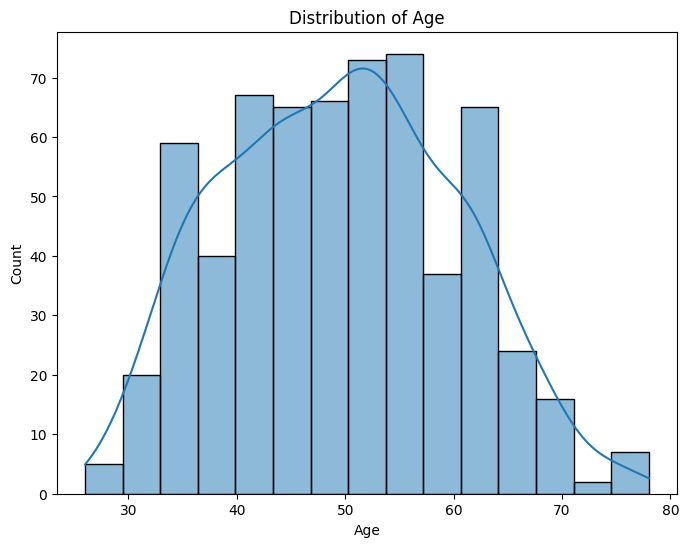

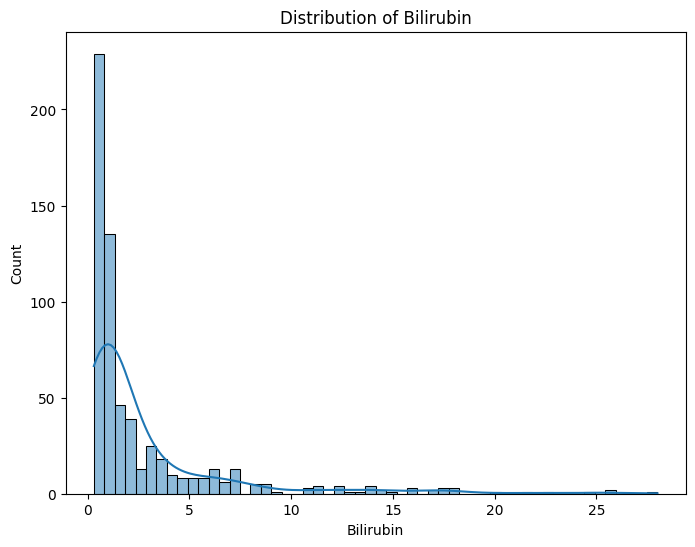

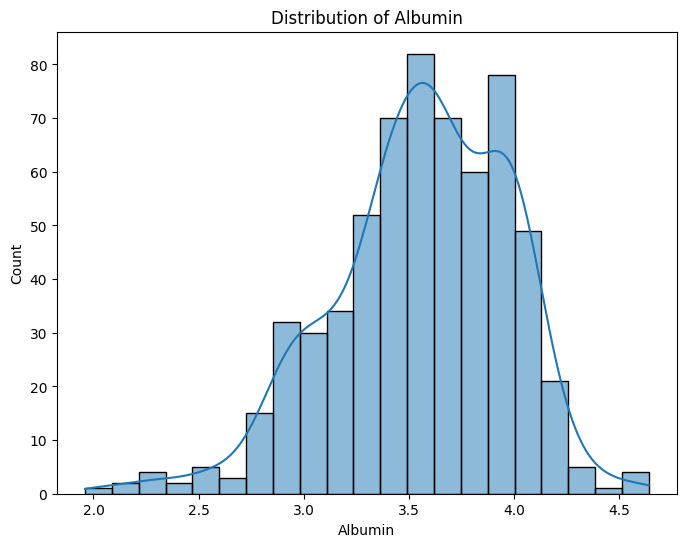

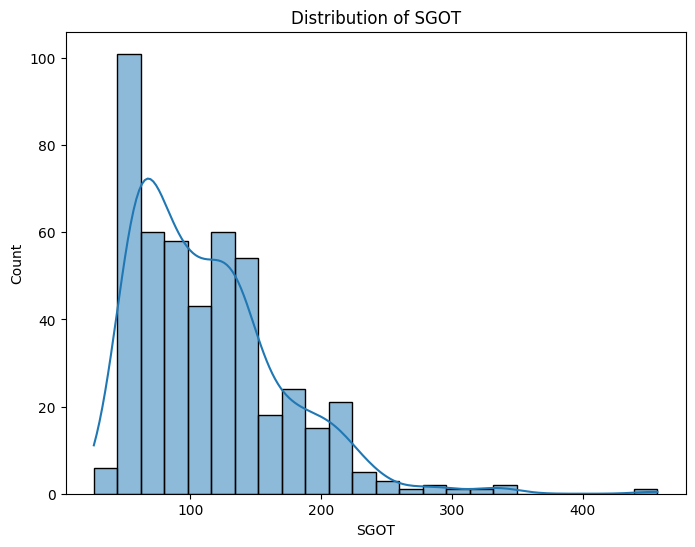

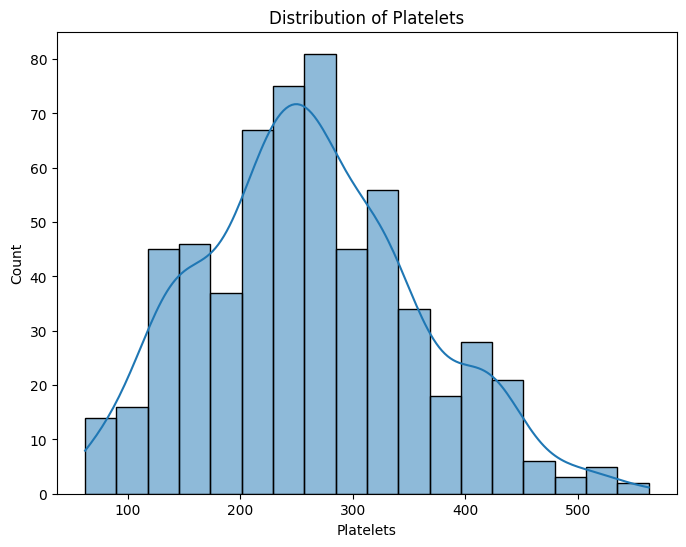

In [17]:
#Plotting Bar graphs for different columns
num_columns = [ 'Age', 'Bilirubin', 'Albumin', 'SGOT', 'Platelets']
for column in num_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(dataf1[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

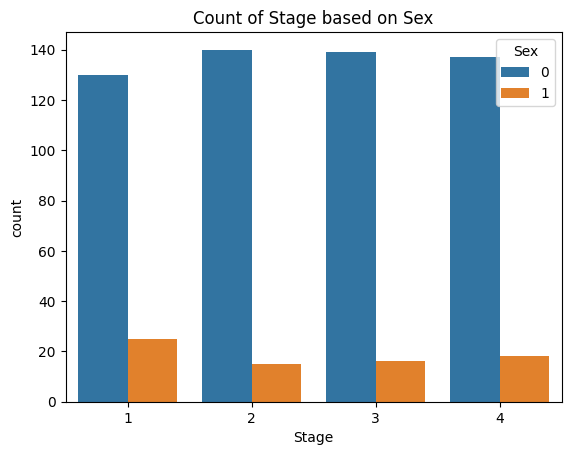

In [18]:
#Plot Bar graph of Stage vs Sex
sns.countplot(x='Stage', hue='Sex', data=dataf1)
plt.title("Count of Stage based on Sex")
plt.show()

In [19]:
#Encode the data
label_encoder = LabelEncoder()
for column in dataf1:
    dataf1[column] = label_encoder.fit_transform(dataf1[column])

In [20]:
#Drop drug column
dataf1 = dataf1.dropna(subset=['Drug'])

In [21]:
#Auto fill the data for the below columns
auto_fill = ['Bilirubin', 'Copper', 'Alk_Phos', 'SGOT', 'Platelets', 'Prothrombin', 'Stage']
dataf1[auto_fill] = dataf1[auto_fill].fillna(dataf1[auto_fill].mean())

In [22]:
dataf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Drug           620 non-null    int64
 1   Age            620 non-null    int64
 2   Sex            620 non-null    int64
 3   Ascites        620 non-null    int64
 4   Hepatomegaly   620 non-null    int64
 5   Spiders        620 non-null    int64
 6   Edema          620 non-null    int64
 7   Bilirubin      620 non-null    int64
 8   Cholesterol    620 non-null    int64
 9   Albumin        620 non-null    int64
 10  Copper         620 non-null    int64
 11  Alk_Phos       620 non-null    int64
 12  SGOT           620 non-null    int64
 13  Tryglicerides  620 non-null    int64
 14  Platelets      620 non-null    int64
 15  Prothrombin    620 non-null    int64
 16  Stage          620 non-null    int64
dtypes: int64(17)
memory usage: 82.5 KB


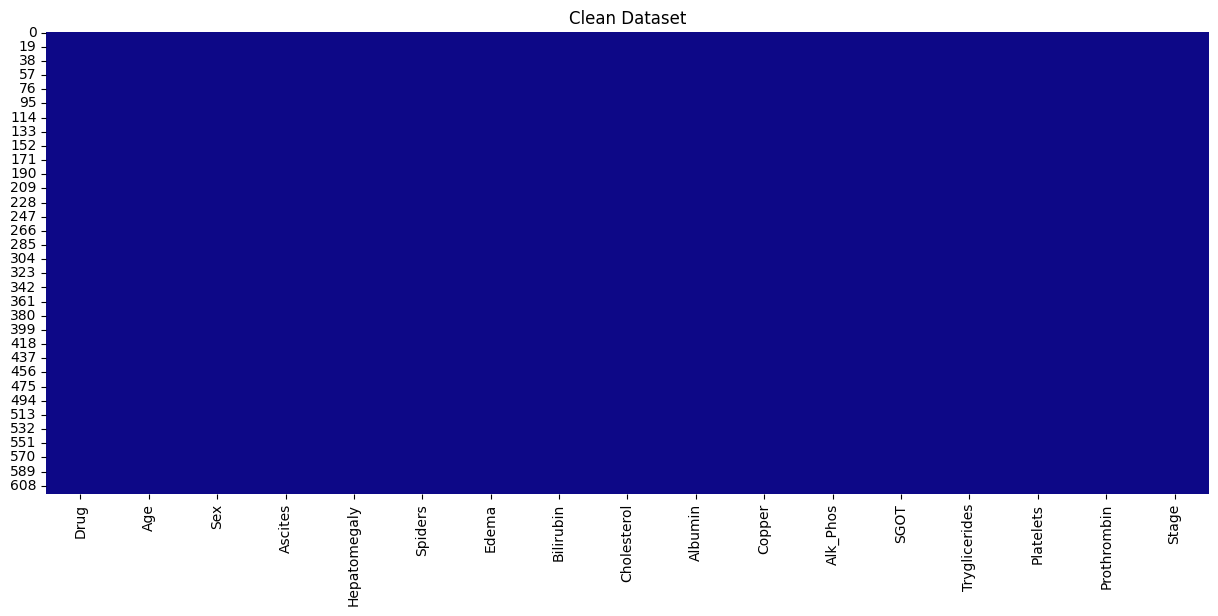

In [23]:
#Plot clean heat map of the dataset
Null_values2 = dataf1.isnull()
plt.figure(figsize=(15, 6))
sns.heatmap(Null_values2, cmap='plasma', cbar=False)
plt.title('Clean Dataset')
plt.show()

In [24]:
#Drop the target variable
X = dataf1.drop(columns=['Stage'])
y = dataf1['Stage']

In [25]:
#Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

In [26]:
#Fit Transform the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train[:5])
print(X_test[:5])

[[-1.02015878  0.32048617 -0.38094453  0.55961717  0.29105686  0.40763824
  -0.3427306  -0.43016397 -0.79398347 -1.22209681  1.35363313 -0.0406257
   0.53192619 -1.31141187 -1.09293372  0.39030256]
 [-1.02015878 -1.12636885 -0.38094453 -0.60804558 -0.93533805 -0.77971072
  -0.3427306  -0.73190448 -1.21452146 -1.7030094  -1.27016201 -1.29262595
  -1.26641411 -0.98395834 -1.2003809  -0.94429565]
 [-1.02015878 -0.25825584 -0.38094453 -0.60804558  0.29105686 -0.77971072
  -0.3427306   1.46649066  0.45361256 -1.47669759 -0.3835002   0.57125413
   0.56375523 -0.61798087 -0.31010429 -0.12300444]
 [-1.02015878  0.32048617 -0.38094453 -0.60804558  0.29105686 -0.77971072
  -0.3427306  -0.47326976 -0.9341628  -0.59973933 -0.89016409 -0.54895663
  -0.3592867  -1.21510201 -1.46132404 -0.12300444]
 [-1.02015878  0.51340017 -0.38094453 -0.60804558 -0.93533805 -0.77971072
  -0.3427306  -0.68879869 -0.52764275  1.40877798 -1.14349604 -1.12318231
  -1.20275604 -0.98395834 -0.07986034 -0.02034304]]
[[ 0.

In [27]:
#XGBOOST
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
print(xgboost.score(X_train, y_train))
y_pred1 = xgboost.predict(X_test)

1.0


In [28]:
xgb_predictions = xgboost.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f'XGB Accuracy: {xgb_accuracy:.2f}')

XGB Accuracy: 0.73


[[36  0  0  0]
 [ 0 45  8  4]
 [ 0 13 20  7]
 [ 1  6 11 35]]


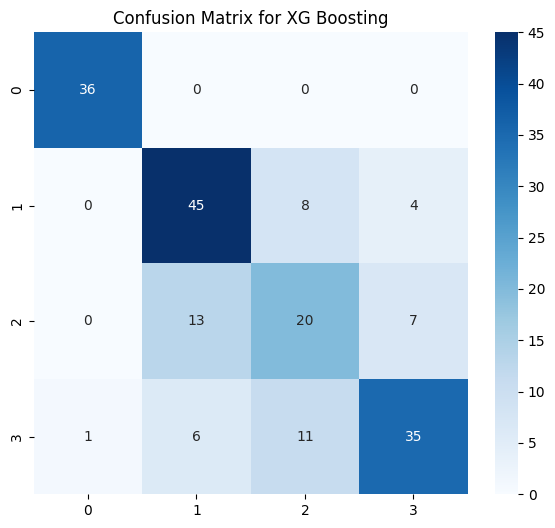

In [29]:
#Confusion Matrix
cm = confusion_matrix(y_test,xgb_predictions)
print(cm)
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, xgb_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for XG Boosting')
plt.show()

In [30]:
#Random Forest
randomf=RandomForestClassifier()
randomf.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
print(randomf.score(X_train, y_train))
y_pred1 = randomf.predict(X_test)

1.0


In [32]:
prediction3=randomf.predict(X_test)
randomf_acc = accuracy_score(y_test, prediction3)
print(f'Random_Forest_accuracy: {randomf_acc:.2f}')

Random_Forest_accuracy: 0.69


[[36  0  0  0]
 [ 2 40 12  3]
 [ 1 12 23  4]
 [ 0  5 19 29]]


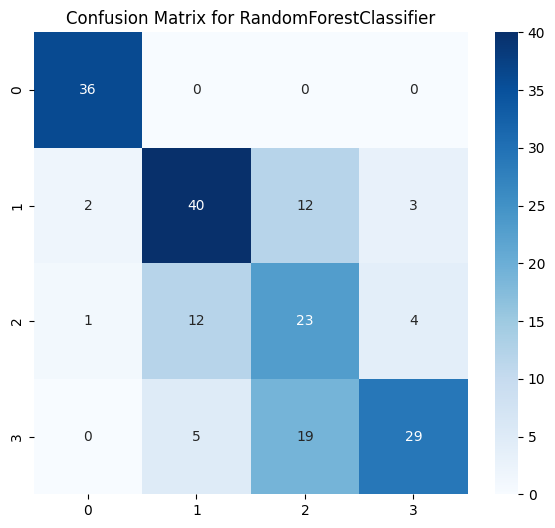

In [33]:
#Confusion Matrix
cm1 = confusion_matrix(y_test, prediction3)
print(cm1)
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, prediction3), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [34]:
#Support Vector Machine
supportvm_classifier = SVC(kernel='rbf')
supportvm_classifier.fit(X_train, y_train)

SVC()

In [35]:
print(supportvm_classifier.score(X_train, y_train))
y_pred1 = supportvm_classifier.predict(X_test)

0.7419354838709677


In [36]:
supportvm_predictions = supportvm_classifier.predict(X_test)
supportvm_accuracy = accuracy_score(y_test, supportvm_predictions)
print(f'SVM Accuracy: {supportvm_accuracy:.2f}')

SVM Accuracy: 0.59


[[32  3  1  0]
 [ 9 29 15  4]
 [ 4  9 19  8]
 [ 2  5 16 30]]


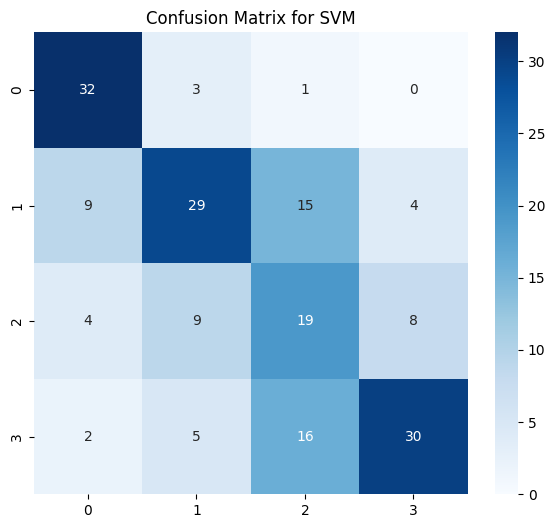

In [37]:
#Confusion Matrix
cm2 = confusion_matrix(y_test, supportvm_predictions)
print(cm2)
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix(y_test, supportvm_predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.show()

In [38]:
import joblib
joblib.dump(xgboost, 'xgb_model.pkl')

['xgb_model.pkl']

# Predicted Class Assigned to Each Stage
# Stage-1 has predicted Class-0
# Stage-2 has predicted Class-1

# Stage-3 has predicted Class-2

# Stage-4 has predicted Class-3

In [48]:
# Load the Model
loaded_model = joblib.load('xgb_model.pkl')

# User input data
user_input_data = [[1,50, 0, 0, 0, 0, 0, 6.0, 614.0,3.7,158.0,5084.0, 206.4,93.0,360.0,10.6]]

# Predict
predictions = loaded_model.predict(user_input_data)

# Display the predictions
print("Liver Cirrhossis Stage:", predictions+1)  #Plus one for getting the actual stage

Liver Cirrhossis Stage: [1]
